## **Libraries Needed**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Graph-Plot**

In [ ]:
def plot_deg_dist(G):
	all_degree=dict(nx.degree(G)).values()
	
	unique_degree=list(set(all_degree))
	
	count_degree=[]
	all_degree=list(all_degree)
	
	for i in unique_degree:
		x=all_degree.count(i)
		count_degree.append(x)
	
	
	
	plt.plot(unique_degree,count_degree,'yo-')
	plt.xlabel('Degrees')
	plt.ylabel('No of nodes ')
	plt.title('Degree distribution of network')
	plt.show()

In [ ]:
def k_distrib(graph, scale='lin', colour='blue', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='yellow')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

## **Erdos-Renyi Model**

In [ ]:
#n: Number of Nodes
#m: Number of Edges

def erdos_reyni(n,m):
  G = nx.gnm_random_graph(n, m)
  print("Shortest path ")
  for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))
  print(nx.average_clustering(G))
  plot_deg_dist(G)
  k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)

## **Watts-Strogatz Model**

In [ ]:
def ws_model(n, m):
  G =nx.watts_strogatz_graph(n, m, 0.65, seed=None)
  print("Shortest path ")
  for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))
    
  print(nx.average_clustering(G))
  plot_deg_dist(G)
  k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)

## **Barabasi-Albert Model**

In [ ]:
def ba_model(n, m):
  G=nx.barabasi_albert_graph(n, m, seed=None)
  for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))
  print(nx.average_clustering(G))
  plot_deg_dist(G)
  k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)

# **Dataset-1 : email-Eu-core Dataset**

**Calculating Number of Nodes & Number of Edges**

In [ ]:
M = nx.read_edgelist('/content/drive/MyDrive/Sem2/Assignment/Assignemnt-1/email-Eu-core.txt')

n = int(M.number_of_nodes())
m = int(M.number_of_edges())

print("Total number of nodes: ", n) 
print("Total number of edges: ", m)

Total number of nodes:  1005
Total number of edges:  16706


**Applying Erdos-Reyni Model**

Shortest path 
2.2886008205982042
0.033637640082541595


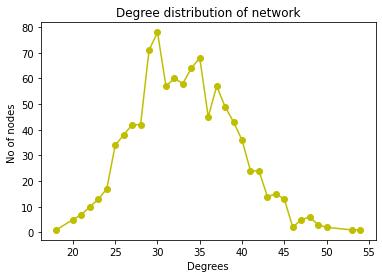

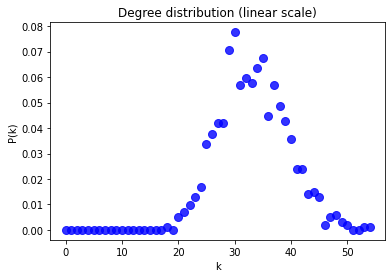

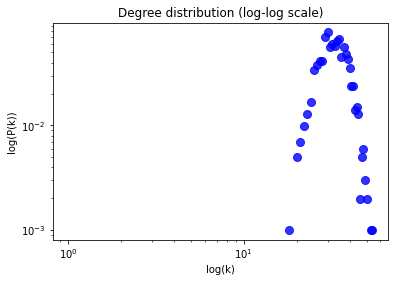

In [ ]:
erdos_reyni(n,m)

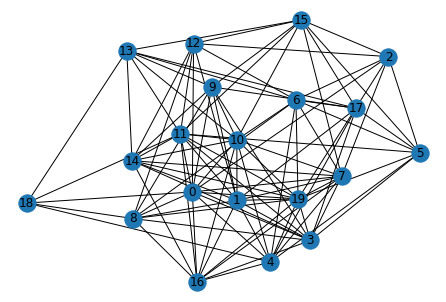

In [ ]:
G= nx.erdos_renyi_graph(20,0.5) 
nx.draw(G, with_labels=True) 
plt.show()

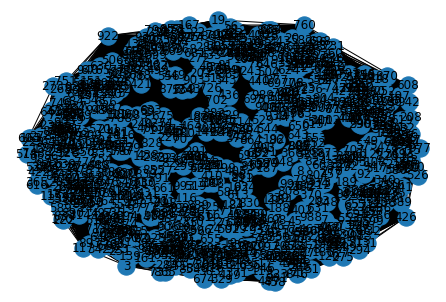

In [ ]:
G= nx.erdos_renyi_graph(n,0.5) 
nx.draw(G, with_labels=True) 
plt.show()

**Applying Watts-Strogatz Model**

Shortest path 
3.309421022378149
0.035902442195127525


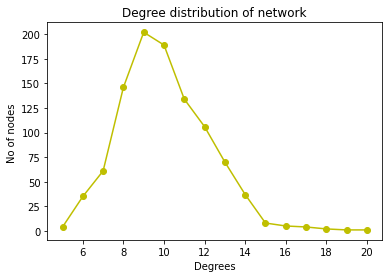

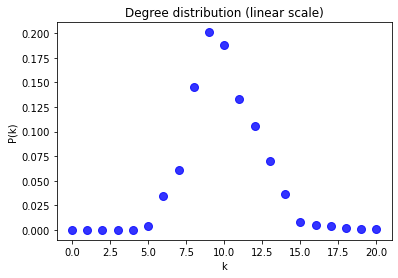

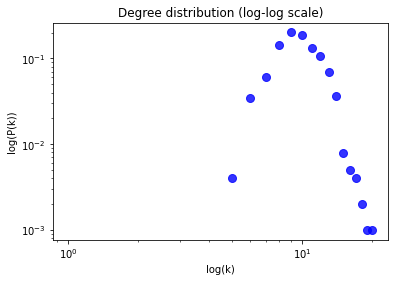

In [ ]:
ws_model(n, 10)

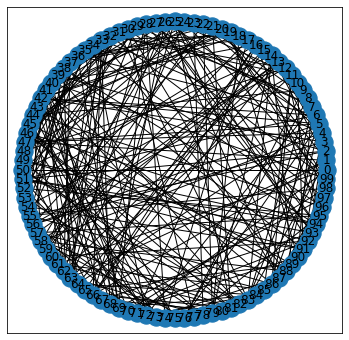

In [ ]:
G = nx.watts_strogatz_graph(n = 100, k = 10, p = 0.5)
pos = nx.circular_layout(G)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G, pos)

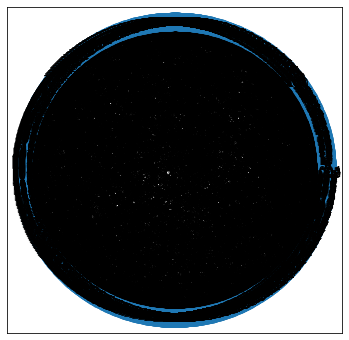

In [ ]:
G = nx.watts_strogatz_graph(n, k = 10, p = 0.5)
pos = nx.circular_layout(G)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G, pos)

**Applying Barabasi-Albert Model**

2.4573209648966325
0.0687039251555958


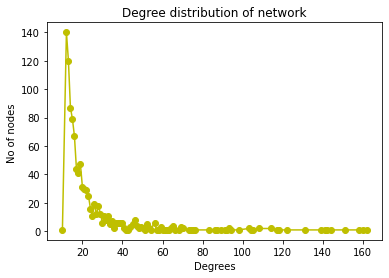

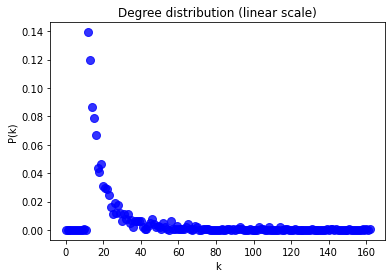

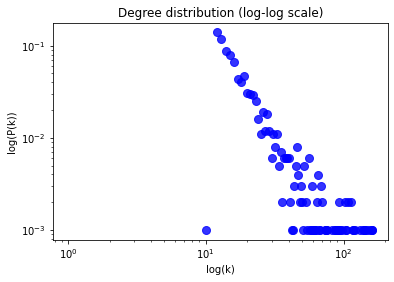

In [ ]:
ba_model(n, 12)

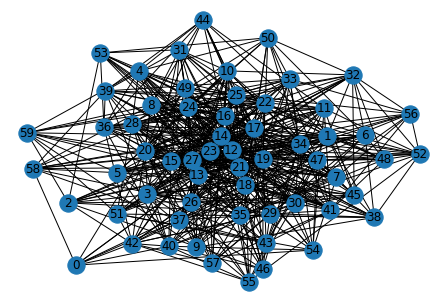

In [ ]:
#import networkx as nx
G= nx.barabasi_albert_graph(60,12)
nx.draw(G, with_labels=True)

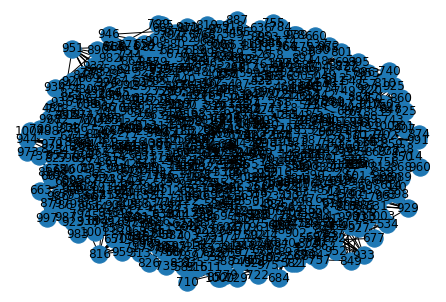

In [ ]:
G= nx.barabasi_albert_graph(n,12)
nx.draw(G, with_labels=True)

# **Dataset-2 : CA-GrQc Dataset**

**Calculating Number of Nodes & Number of Edges**

In [ ]:
M = nx.read_edgelist('/content/drive/MyDrive/Sem2/Assignment/Assignemnt-1/CA-GrQc.txt')

n = int(M.number_of_nodes())
m = int(M.number_of_edges())

print("Total number of nodes: ", n) 
print("Total number of edges: ", m)

Total number of nodes:  5242
Total number of edges:  14496


**Applying Erdos-Reyni Model**

Shortest path 
2.2888902103030664
0.03273911525333677


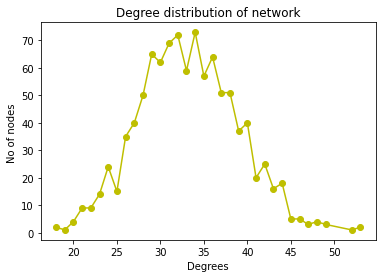

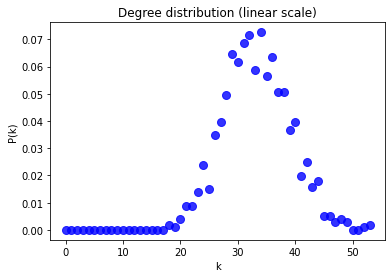

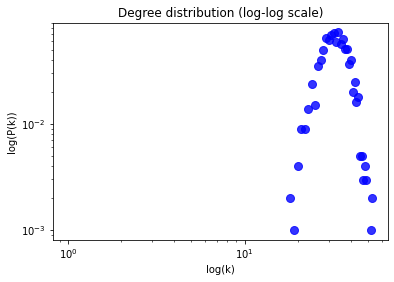

In [ ]:
erdos_reyni(n, m)

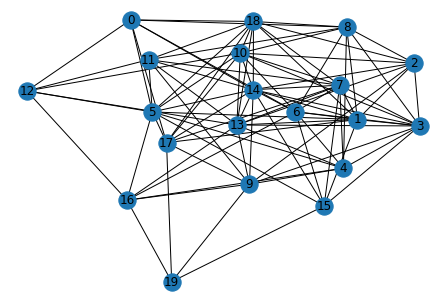

In [ ]:
G= nx.erdos_renyi_graph(20,0.5) 
nx.draw(G, with_labels=True) 
plt.show()

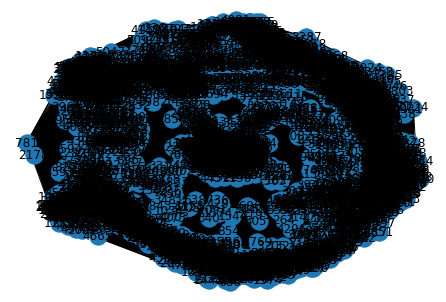

In [ ]:
G= nx.erdos_renyi_graph(n,0.5) 
nx.draw(G, with_labels=True) 
plt.show()

**Applying Watts-Strogatz Model**

Shortest path 
3.308790707815504
0.03964633763141248


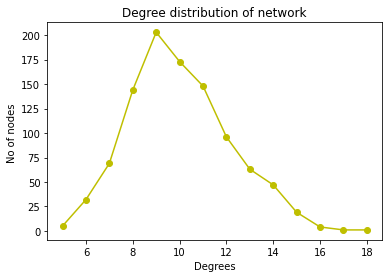

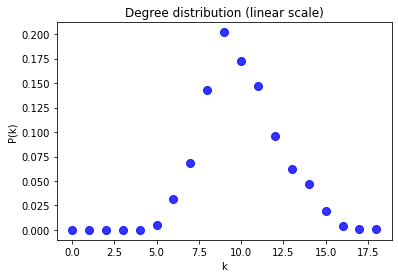

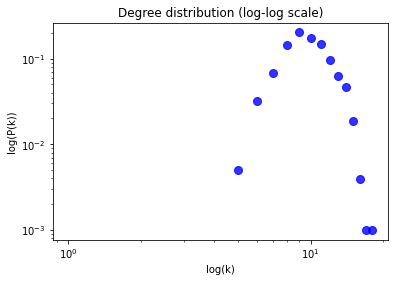

In [ ]:
ws_model(n, 10)

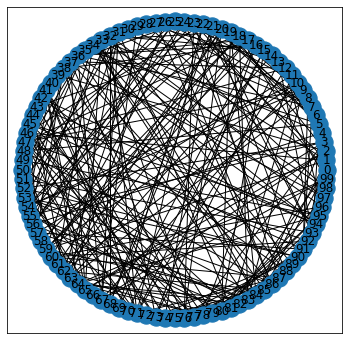

In [ ]:
G = nx.watts_strogatz_graph(n = 100, k = 10, p = 0.5)
pos = nx.circular_layout(G)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G, pos)

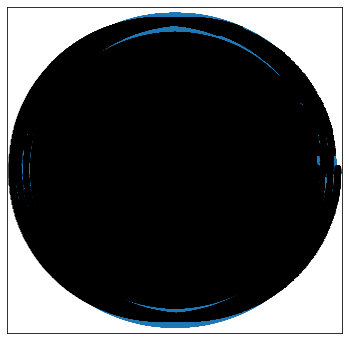

In [ ]:
G = nx.watts_strogatz_graph(n, k = 10, p = 0.5)
pos = nx.circular_layout(G)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G, pos)

**Applying Barabasi-Albert Model**

2.4633664347584787
0.06529057234530404


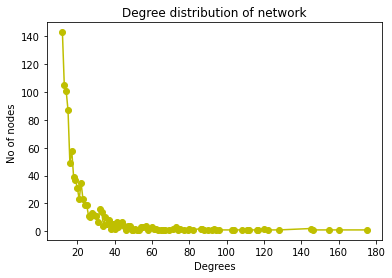

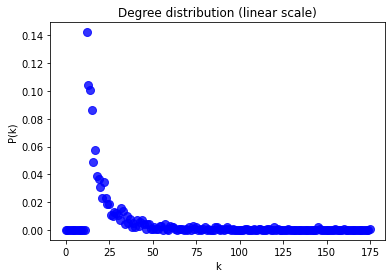

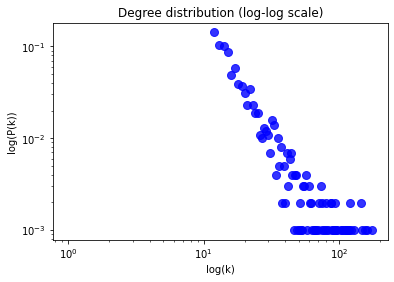

In [ ]:
ba_model(n, 12)

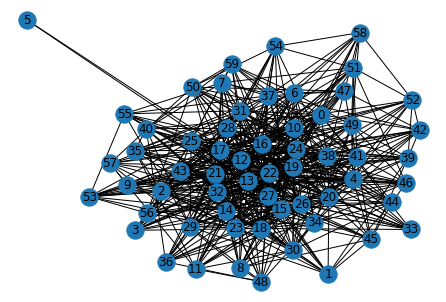

In [ ]:
G= nx.barabasi_albert_graph(60,12)
nx.draw(G, with_labels=True)

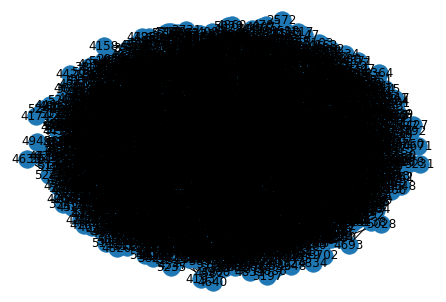

In [ ]:
G= nx.barabasi_albert_graph(n,12)
nx.draw(G, with_labels=True)

# **Dataset-3 : soc-sign-bitcoin**

**Calculating Number of Nodes & Number of Edges**

In [ ]:
M = nx.read_edgelist('/content/drive/MyDrive/Sem2/Assignment/Assignemnt-1/soc-sign-bitcoin.txt')

n = int(M.number_of_nodes())
m = int(M.number_of_edges())

print("Total number of nodes: ", n) 
print("Total number of edges: ", m)

Total number of nodes:  5881
Total number of edges:  21492


**Applying Erdos-Reyni Model**

Shortest path 
2.2885413569602187
0.032516380271011176


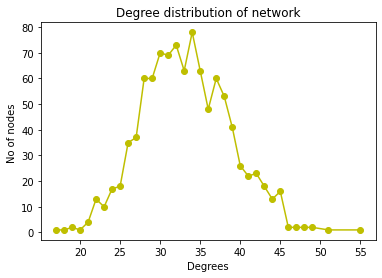

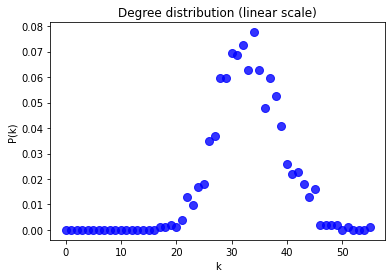

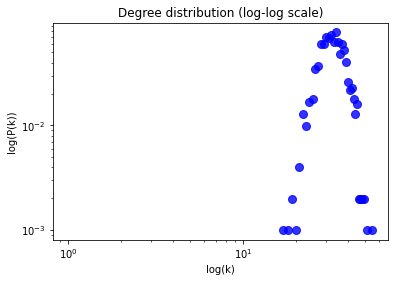

In [ ]:
erdos_reyni(n, m)

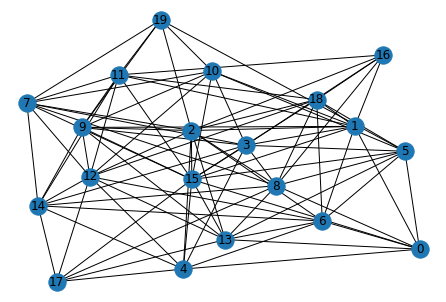

In [ ]:
G= nx.erdos_renyi_graph(20,0.5) 
nx.draw(G, with_labels=True) 
plt.show()

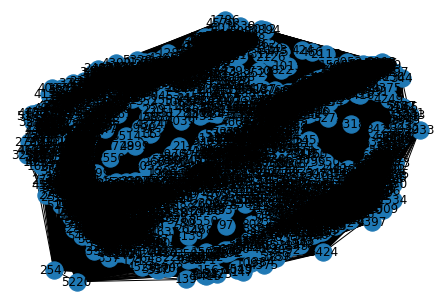

In [ ]:
G= nx.erdos_renyi_graph(n,0.5) 
nx.draw(G, with_labels=True) 
plt.show()

**Applying Watts-Strogatz Model**

Shortest path 
3.310160353610434
0.03939168349616133


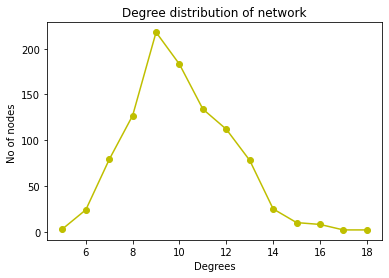

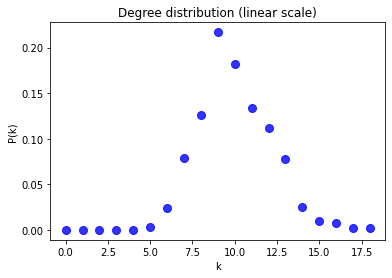

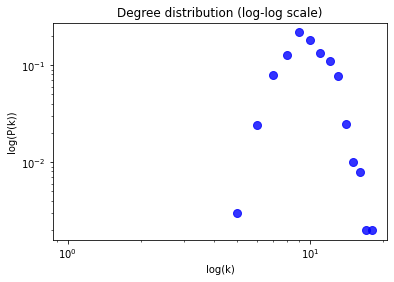

In [ ]:
ws_model(n, 10)

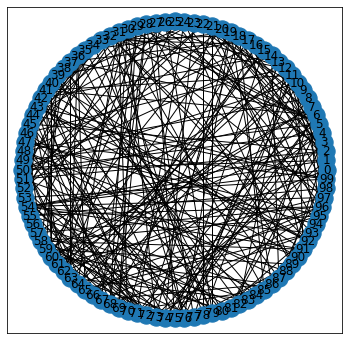

In [ ]:
G = nx.watts_strogatz_graph(n = 100, k = 10, p = 0.5)
pos = nx.circular_layout(G)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G, pos)

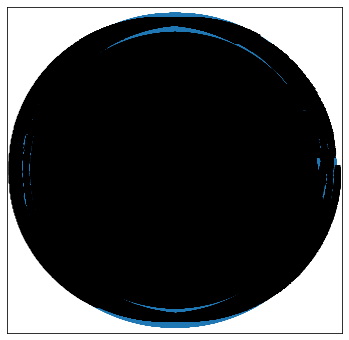

In [ ]:
G = nx.watts_strogatz_graph(n, k = 10, p = 0.5)
pos = nx.circular_layout(G)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G, pos)

**Applying Barabasi-Albert Model**

2.4629264038373866
0.06670875197399005


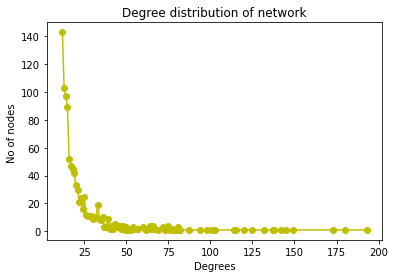

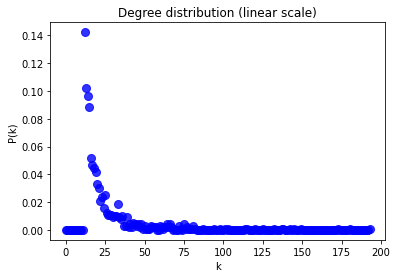

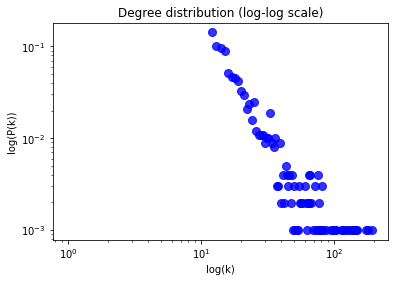

In [ ]:
ba_model(n, 12)

**BA Model graph with 60 nodes following the preferential attachment model**

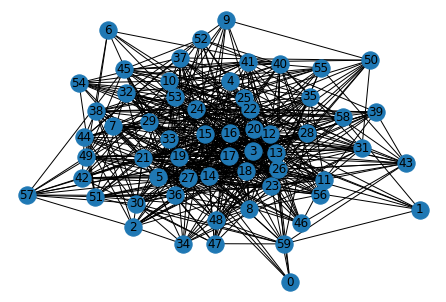

In [ ]:
G= nx.barabasi_albert_graph(60,12)
nx.draw(G, with_labels=True)

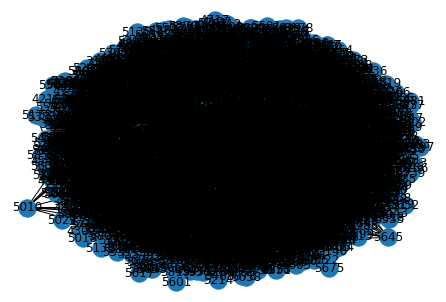

In [ ]:
G= nx.barabasi_albert_graph(n,12)
nx.draw(G, with_labels=True)

**End :)**